<a href="https://colab.research.google.com/github/Wanita-8943/My_Main_Project_Lt-/blob/main/F1_Predict_Freeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [ ]:
df = pd.read_csv (r'/content/drive/MyDrive/All_File_Lt/Data/All_Data_Lt.csv')
df

,Fig_Age,Fig_Person,Class_Age+Gender,Class_Age,Class_0-18,Age(year),Class_0-1,Filename,Path_filename,Sex,Floder
0,1,1,Y07F,Y07,0,7,0,V1.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
1,2,1,Y07F,Y07,0,7,0,Flip_V1.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
2,3,2,Y07F,Y07,0,7,0,V2.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
3,4,2,Y07F,Y07,0,7,0,Flip_V2.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
4,5,3,Y07F,Y07,0,7,0,V3.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
...,...,...,...,...,...,...,...,...,...,...,...
4745,121,77,Y25M,Y25,18,25,1,Flip_J463.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both
4746,122,78,Y25M,Y25,18,25,1,J464.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both
4747,123,78,Y25M,Y25,18,25,1,Flip_J464.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both
4748,124,79,Y25M,Y25,18,25,1,J465.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Male,Both


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/All_File_Lt/Model/Classification/Female/F1_Freeze_250_Lt.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/All_File_Lt/Model/Classification/Female/F1_Freeze_250_Lt.h5')
height = width = model.input_shape[1]

In [ ]:
Female = df[(df['Sex'] == 'Female')]
Female

,Fig_Age,Fig_Person,Class_Age+Gender,Class_Age,Class_0-18,Age(year),Class_0-1,Filename,Path_filename,Sex,Floder
0,1,1,Y07F,Y07,0,7,0,V1.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
1,2,1,Y07F,Y07,0,7,0,Flip_V1.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
2,3,2,Y07F,Y07,0,7,0,V2.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
3,4,2,Y07F,Y07,0,7,0,Flip_V2.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
4,5,3,Y07F,Y07,0,7,0,V3.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
...,...,...,...,...,...,...,...,...,...,...,...
2370,121,65,Y25F,Y25,18,25,0,J145.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Lt
2371,122,66,Y25F,Y25,18,25,0,J149.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Lt
2372,123,67,Y25F,Y25,18,25,0,J158.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Lt
2373,124,68,Y25F,Y25,18,25,0,J177.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Lt


In [ ]:
train = Female[Female['Fig_Age'].between(1,75)]
test = Female[Female['Fig_Age'].between(101,125)]

In [ ]:
DATA_PATH = "/content/drive/My Drive/All_File_Lt/TVT_All_Lt"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/All_File_Lt/TVT_All_Lt/train
/content/drive/My Drive/All_File_Lt/TVT_All_Lt/test


In [ ]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_filename',
        y_col = 'Class_Age+Gender',
        class_mode = 'categorical',
        target_size=(height, width),
        batch_size=batch_size)

#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 1425 validated image filenames belonging to 19 classes.
{0: 'Y07F', 1: 'Y08F', 2: 'Y09F', 3: 'Y10F', 4: 'Y11F', 5: 'Y12F', 6: 'Y13F', 7: 'Y14F', 8: 'Y15F', 9: 'Y16F', 10: 'Y17F', 11: 'Y18F', 12: 'Y19F', 13: 'Y20F', 14: 'Y21F', 15: 'Y22F', 16: 'Y23F', 17: 'Y24F', 18: 'Y25F'}


In [ ]:
test = Female[Female['Fig_Age'].between(101,125)]
test

,Fig_Age,Fig_Person,Class_Age+Gender,Class_Age,Class_0-18,Age(year),Class_0-1,Filename,Path_filename,Sex,Floder
100,101,52,Y07F,Y07,0,7,0,V67.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
101,102,52,Y07F,Y07,0,7,0,Flip_V67.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
102,103,53,Y07F,Y07,0,7,0,V68.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
103,104,53,Y07F,Y07,0,7,0,Flip_V68.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
104,105,54,Y07F,Y07,0,7,0,V69.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Both
...,...,...,...,...,...,...,...,...,...,...,...
2370,121,65,Y25F,Y25,18,25,0,J145.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Lt
2371,122,66,Y25F,Y25,18,25,0,J149.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Lt
2372,123,67,Y25F,Y25,18,25,0,J158.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Lt
2373,124,68,Y25F,Y25,18,25,0,J177.jpg,/content/drive/My Drive/All_File_Lt/TVT_All_Lt...,Female,Lt


In [ ]:
act = test['Class_Age+Gender'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path
act_Re = test['Class_0-18'].tolist() #ค่าจริง

In [ ]:
# act

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [ ]:
predict_image(path[0])

1/1 [==============================] - 0s 64ms/step


array([9.1457230e-01, 5.0913107e-02, 2.5088130e-02, 7.4215839e-03,
       1.5089399e-03, 3.0235894e-04, 6.1663750e-06, 2.1597978e-05,
       5.2085188e-06, 5.8354235e-06, 1.8004417e-06, 1.5598987e-05,
       1.4102863e-05, 4.4950048e-05, 1.4853321e-05, 5.0597409e-06,
       3.4086726e-05, 2.1397431e-05, 2.8427760e-06], dtype=float32)

In [ ]:
no = np.argmax(predict_image(path[0]))
labels[no]

1/1 [==============================] - 0s 62ms/step


'Y07F'

In [ ]:
#Predict
pred_list = list()
prob_list = list()
pred_Re = list()

img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    pred_Re.append(result)
    prob_list.append(predict[result])

1/1 [==============================] - 0s 59ms/step


In [ ]:
pred_list

['Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y12F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y08F',
 'Y10F',
 'Y07F',
 'Y07F',
 'Y08F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y09F',
 'Y10F',
 'Y11F',
 'Y07F',
 'Y09F',
 'Y09F',
 'Y08F',
 'Y09F',
 'Y08F',
 'Y07F',
 'Y10F',
 'Y09F',
 'Y12F',
 'Y09F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y11F',
 'Y10F',
 'Y08F',
 'Y09F',
 'Y11F',
 'Y10F',
 'Y08F',
 'Y09F',
 'Y10F',
 'Y10F',
 'Y08F',
 'Y10F',
 'Y09F',
 'Y07F',
 'Y07F',
 'Y11F',
 'Y12F',
 'Y08F',
 'Y08F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y11F',
 'Y10F',
 'Y09F',
 'Y11F',
 'Y09F',
 'Y11F',
 'Y11F',
 'Y10F',
 'Y07F',
 'Y07F',
 'Y10F',
 'Y14F',
 'Y12F',
 'Y10F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y11F',
 'Y11F',
 'Y10F',
 'Y07F',
 'Y11F',
 'Y11F',
 'Y10F',
 'Y07F',
 'Y07F',
 'Y07F',
 'Y11F',
 'Y11F',
 'Y11F',
 'Y10F',
 'Y12F',
 'Y12F',
 'Y11F',
 'Y07F',
 'Y07F',
 'Y12F',
 'Y11F',
 

In [ ]:
prob_list[0]

0.9145723

In [ ]:
# data_train = valframe
# #เช็คคลาสใน Predicted
# pred_class = set(data_train['category_ov'])
# print('Predicted : ',len(pred_class))
# print(pred_class)
# print('-'*50)
# #เช็คคลาสใน Actual
# classe = set(data_train['class'])
# print('Actual : ',len(classe))
# print(classe)

In [ ]:
pred = np.array(pred_list) #แปลงเป็น array
act = np.array(act)

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 18.736842105263158%
              precision    recall  f1-score   support

        Y07F       0.43      0.96      0.59        25
        Y08F       0.44      0.16      0.24        25
        Y09F       0.27      0.12      0.17        25
        Y10F       0.28      0.20      0.23        25
        Y11F       0.15      0.60      0.24        25
        Y12F       0.27      0.56      0.37        25
        Y13F       1.00      0.04      0.08        25
        Y14F       0.09      0.20      0.13        25
        Y15F       0.00      0.00      0.00        25
        Y16F       0.25      0.04      0.07        25
        Y17F       0.00      0.00      0.00        25
        Y18F       0.05      0.08      0.06        25
        Y19F       0.00      0.00      0.00        25
        Y20F       0.05      0.04      0.04        25
        Y21F       0.00      0.00      0.00        25
        Y22F       0.05      0.04      0.04        25
        Y23F       0.14      0.20      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 66.5, 'Predicted label')

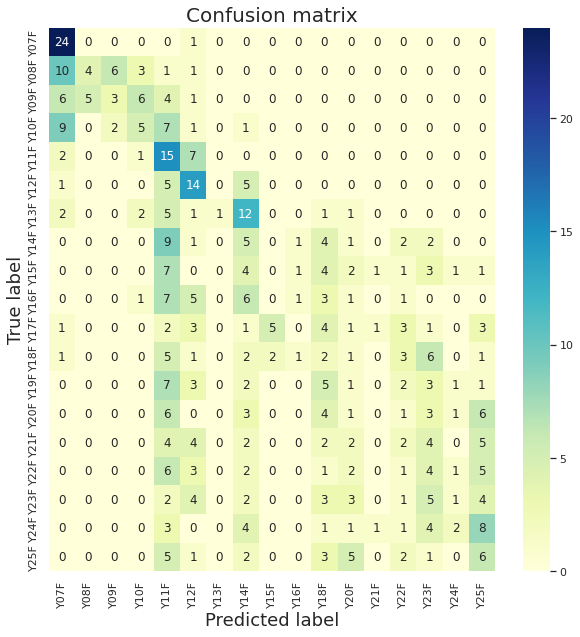

In [ ]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

#MSE MAE RMSE


In [ ]:
act_Re = np.array(act_Re)
pred_int = np.around(pred_Re)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(act_Re, pred_int)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(act_Re, pred_int) #default=True
rmse = mean_squared_error(act_Re, pred_int, squared=False)
  
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 3.393684210526316
MSE: 22.837894736842106
RMSE: 4.7789009967608775
